In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [11]:
X, y = make_moons(n_samples = 1000, noise = 0.1)

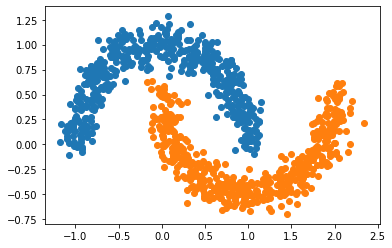

In [12]:
plt.scatter(X[:,0][y==0], X[:,1][y==0])
plt.scatter(X[:,0][y==1], X[:,1][y==1])

In [13]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps = 0.1)

In [22]:
dbscan.fit(X)

DBSCAN(eps=0.1)

In [33]:
dbscan.core_sample_indices_.shape

(937,)

In [42]:
dbscan.labels_[dbscan.core_sample_indices_]

(937,)

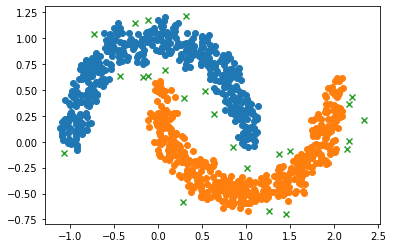

In [46]:
import numpy as np
plt.scatter(
    dbscan.components_[:,0][dbscan.labels_[dbscan.core_sample_indices_]==1], 
    dbscan.components_[:,1][dbscan.labels_[dbscan.core_sample_indices_]==1])

plt.scatter(
    dbscan.components_[:,0][dbscan.labels_[dbscan.core_sample_indices_]==0], 
    dbscan.components_[:,1][dbscan.labels_[dbscan.core_sample_indices_]==0])

plt.scatter(
    X[:,0][dbscan.labels_==-1], 
    X[:,1][dbscan.labels_==-1], marker = 'x')

## Train classifier to enable dbscan to predict the new instances

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.